In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
os.listdir('drive/MyDrive/Colab Notebooks/MySkill')
path = 'drive/MyDrive/Colab Notebooks/MySkill/Online Retail Data.csv'

In [3]:
data = pd.read_csv(path)
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB


In [5]:
df.isna().value_counts()

order_id  product_code  product_name  quantity  order_date  price  customer_id
False     False         False         False     False       False  False          360853
                                                                   True            98202
                        True          False     False       False  True             2718
Name: count, dtype: int64

In [6]:
df['product_name'] = df['product_name'].str.lower()
df = df[~df['product_name'].isna()]
df = df[~df['product_name'].str.contains('test')]
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id
1,C493411,21539,retro spots butter dish,-1,2010-01-04 09:43:00,4.25,14590.0
3,493413,21724,panda and bunnies sticker sheet,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,elephant toy with blue t-shirt,1,2010-01-04 09:54:00,3.75,NaN
5,493413,21723,alphabet hearts sticker sheet,1,2010-01-04 09:54:00,0.85,NaN
6,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0
...,...,...,...,...,...,...,...
461768,539991,21618,4 wildflower botanical candles,1,2010-12-23 16:49:00,1.25,NaN
461769,539991,72741,grand chocolatecandle,4,2010-12-23 16:49:00,1.45,NaN
461770,539992,21470,flower vine raffia food cover,1,2010-12-23 17:41:00,3.75,NaN
461771,539992,22258,felt farm animal rabbit,1,2010-12-23 17:41:00,1.25,NaN


In [7]:
df['quantity'] = df['quantity'].abs()
df['order_status'] = np.where(df['order_id'].str.contains('C'), 'cancelled', 'delivered')
df[df['order_status']== 'cancelled']
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status
1,C493411,21539,retro spots butter dish,1,2010-01-04 09:43:00,4.25,14590.0,cancelled
3,493413,21724,panda and bunnies sticker sheet,1,2010-01-04 09:54:00,0.85,NaN,delivered
4,493413,84578,elephant toy with blue t-shirt,1,2010-01-04 09:54:00,3.75,NaN,delivered
5,493413,21723,alphabet hearts sticker sheet,1,2010-01-04 09:54:00,0.85,NaN,delivered
6,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0,delivered
...,...,...,...,...,...,...,...,...
461768,539991,21618,4 wildflower botanical candles,1,2010-12-23 16:49:00,1.25,NaN,delivered
461769,539991,72741,grand chocolatecandle,4,2010-12-23 16:49:00,1.45,NaN,delivered
461770,539992,21470,flower vine raffia food cover,1,2010-12-23 17:41:00,3.75,NaN,delivered
461771,539992,22258,felt farm animal rabbit,1,2010-12-23 17:41:00,1.25,NaN,delivered


In [8]:
df[df['price']>0].sort_values('price', ascending=True)
df = df[df['price']>0]
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status
1,C493411,21539,retro spots butter dish,1,2010-01-04 09:43:00,4.25,14590.0,cancelled
3,493413,21724,panda and bunnies sticker sheet,1,2010-01-04 09:54:00,0.85,NaN,delivered
4,493413,84578,elephant toy with blue t-shirt,1,2010-01-04 09:54:00,3.75,NaN,delivered
5,493413,21723,alphabet hearts sticker sheet,1,2010-01-04 09:54:00,0.85,NaN,delivered
6,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0,delivered
...,...,...,...,...,...,...,...,...
461768,539991,21618,4 wildflower botanical candles,1,2010-12-23 16:49:00,1.25,NaN,delivered
461769,539991,72741,grand chocolatecandle,4,2010-12-23 16:49:00,1.45,NaN,delivered
461770,539992,21470,flower vine raffia food cover,1,2010-12-23 17:41:00,3.75,NaN,delivered
461771,539992,22258,felt farm animal rabbit,1,2010-12-23 17:41:00,1.25,NaN,delivered


In [9]:
df['customer_id'] = df['customer_id'].astype(str)
df['customer_id']

/tmp/ipython-input-4085082520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_id'] = df['customer_id'].astype(str)


,customer_id
1,14590.0
3,nan
4,nan
5,nan
6,14590.0
...,...
461768,nan
461769,nan
461770,nan
461771,nan


In [10]:
df = df.reset_index(drop=True)
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status
0,C493411,21539,retro spots butter dish,1,2010-01-04 09:43:00,4.25,14590.0,cancelled
1,493413,21724,panda and bunnies sticker sheet,1,2010-01-04 09:54:00,0.85,nan,delivered
2,493413,84578,elephant toy with blue t-shirt,1,2010-01-04 09:54:00,3.75,nan,delivered
3,493413,21723,alphabet hearts sticker sheet,1,2010-01-04 09:54:00,0.85,nan,delivered
4,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0,delivered
...,...,...,...,...,...,...,...,...
458241,539991,21618,4 wildflower botanical candles,1,2010-12-23 16:49:00,1.25,nan,delivered
458242,539991,72741,grand chocolatecandle,4,2010-12-23 16:49:00,1.45,nan,delivered
458243,539992,21470,flower vine raffia food cover,1,2010-12-23 17:41:00,3.75,nan,delivered
458244,539992,22258,felt farm animal rabbit,1,2010-12-23 17:41:00,1.25,nan,delivered


In [11]:
df['amount'] = df['quantity'] * df['price']
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status,amount
0,C493411,21539,retro spots butter dish,1,2010-01-04 09:43:00,4.25,14590.0,cancelled,4.25
1,493413,21724,panda and bunnies sticker sheet,1,2010-01-04 09:54:00,0.85,nan,delivered,0.85
2,493413,84578,elephant toy with blue t-shirt,1,2010-01-04 09:54:00,3.75,nan,delivered,3.75
3,493413,21723,alphabet hearts sticker sheet,1,2010-01-04 09:54:00,0.85,nan,delivered,0.85
4,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0,delivered,91.80
...,...,...,...,...,...,...,...,...,...
458241,539991,21618,4 wildflower botanical candles,1,2010-12-23 16:49:00,1.25,nan,delivered,1.25
458242,539991,72741,grand chocolatecandle,4,2010-12-23 16:49:00,1.45,nan,delivered,5.80
458243,539992,21470,flower vine raffia food cover,1,2010-12-23 17:41:00,3.75,nan,delivered,3.75
458244,539992,22258,felt farm animal rabbit,1,2010-12-23 17:41:00,1.25,nan,delivered,1.25


In [12]:
df.describe().round(2)

,quantity,price,amount
count,458246.00,458246.00,458246.00
mean,10.00,4.90,19.51
std,61.18,99.54,118.57
min,1.00,0.00,0.00
25%,1.00,1.25,3.75
50%,3.00,2.10,9.30
75%,10.00,4.21,17.00
max,10000.00,25111.09,25111.09


In [13]:
# jumlahan (sum) subset dari data
df[df['product_name'].str.contains('tea')].sum()

,0
order_id,493414C493415493427C49343049343249343249343249...
product_code,2152721527790002152722072215273750384991375033...
product_name,retro spot traditional teapotretro spot tradit...
quantity,166712
order_date,2010-01-04 10:28:002010-01-04 10:33:002010-01-...
price,65660.81
customer_id,14590.014590.013287.014680.014680.014680.01468...
order_status,deliveredcancelleddeliveredcancelleddeliveredd...
amount,340246.38


In [14]:
# jumlahan (sum) subset dari data
df.loc[df['product_name'].str.contains('tea'), 'quantity'].sum()

np.int64(166712)

In [15]:
df.loc[df['product_name'].str.contains('tea'),'order_id'].nunique()

7627

In [16]:
df.loc[df['product_name'].str.contains('tea'), 'quantity'].mean()

np.float64(9.657185888895325)

In [17]:
df.loc[df['product_name'].str.contains('tea'), 'quantity'].median()

3.0

In [18]:
# dengan 1 kolom sebagai grouping
df.loc[df['product_name'].str.contains('tea')].groupby('product_name')['quantity'].sum().sort_values(ascending=False)

,quantity
product_name,
60 teatime fairy cake cases,27584
antique silver tea glass etched,17190
moroccan tea glass,7218
antique silver tea glass engraved,6941
potting shed tea mug,6222
...,...
english rose tea set in gift box,5
light topaz teal/aqua col necklace,4
ceramic cake teapot with cherry,3


In [19]:
df.loc[df['product_name'].str.contains('tea')].groupby('order_id')['quantity'].sum().sort_values(ascending=True)

,quantity
order_id,
C533157,1
C532820,1
C532027,1
502252,1
530803,1
...,...
493995,1200
519201,1200
515932,1548


In [20]:
df.loc[df['product_name'].str.contains('tea')].groupby(['product_name' ,'order_id'])['quantity'].sum().sort_values(ascending=True)

product_name                    order_id
white tea,coffee,sugar jars     496615         1
                                495805         1
                                494387         1
                                494382         1
vintage red teatime mug         C536023        1
                                            ... 
60 teatime fairy cake cases     509649       720
teatime gel pens asst           493995       720
teatime round pencil sharpener  524096       768
60 teatime fairy cake cases     519201      1200
teatime pen case & pens         524174      4608
Name: quantity, Length: 16807, dtype: int64

# Data Binning

In [21]:
kategori = ['cheap', 'medium', 'expensive']
df['kategori'] = pd.cut(df['price'], 3, labels=kategori, include_lowest=True)
df[df['kategori'].str.contains('medium')]


,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status,amount,kategori
26746,496115,M,manual,1,2010-01-29 11:04:00,8985.60,17949.0,delivered,8985.60,medium
26747,C496116,M,manual,1,2010-01-29 11:05:00,8985.60,17949.0,cancelled,8985.60,medium
82255,C502262,M,manual,1,2010-03-23 15:20:00,10953.50,12918.0,cancelled,10953.50,medium
82256,502263,M,manual,1,2010-03-23 15:22:00,10953.50,12918.0,delivered,10953.50,medium
82257,C502264,M,manual,1,2010-03-23 15:24:00,10953.50,12918.0,cancelled,10953.50,medium
82258,502265,M,manual,1,2010-03-23 15:28:00,10953.50,nan,delivered,10953.50,medium
271009,C522793,M,manual,1,2010-09-16 14:53:00,10468.80,14063.0,cancelled,10468.80,medium
271021,522796,M,manual,1,2010-09-16 15:12:00,10468.80,nan,delivered,10468.80,medium
286126,524159,M,manual,1,2010-09-27 16:12:00,10468.80,14063.0,delivered,10468.80,medium
286156,C524161,M,manual,1,2010-09-27 16:16:00,10468.80,nan,cancelled,10468.80,medium


In [22]:
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status,amount,kategori
0,C493411,21539,retro spots butter dish,1,2010-01-04 09:43:00,4.25,14590.0,cancelled,4.25,cheap
1,493413,21724,panda and bunnies sticker sheet,1,2010-01-04 09:54:00,0.85,nan,delivered,0.85,cheap
2,493413,84578,elephant toy with blue t-shirt,1,2010-01-04 09:54:00,3.75,nan,delivered,3.75,cheap
3,493413,21723,alphabet hearts sticker sheet,1,2010-01-04 09:54:00,0.85,nan,delivered,0.85,cheap
4,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0,delivered,91.80,cheap
...,...,...,...,...,...,...,...,...,...,...
458241,539991,21618,4 wildflower botanical candles,1,2010-12-23 16:49:00,1.25,nan,delivered,1.25,cheap
458242,539991,72741,grand chocolatecandle,4,2010-12-23 16:49:00,1.45,nan,delivered,5.80,cheap
458243,539992,21470,flower vine raffia food cover,1,2010-12-23 17:41:00,3.75,nan,delivered,3.75,cheap
458244,539992,22258,felt farm animal rabbit,1,2010-12-23 17:41:00,1.25,nan,delivered,1.25,cheap


In [23]:
df_summary = df.groupby('kategori').agg(row_count = ('product_code', 'count'), min_price = ('price', 'min'), max_price = ('price', 'max'))
df_summary['range_price'] = df_summary['max_price'] - df_summary['min_price']
df_summary

/tmp/ipython-input-1966505785.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_summary = df.groupby('kategori').agg(row_count = ('product_code', 'count'), min_price = ('price', 'min'), max_price = ('price', 'max'))


,row_count,min_price,max_price,range_price
kategori,,,,
cheap,458227,0.001,7044.79,7044.789
medium,16,8985.600,13541.33,4555.730
expensive,3,18910.690,25111.09,6200.400


# DATA VISUALIZATION

#Bar Chart

In [24]:
df_sum =df.groupby('order_status', as_index=False).agg(order_count = ('order_id', 'nunique'), total_amount = ('amount','sum'))
df_sum

,order_status,order_count,total_amount
0,cancelled,3881,502916.680
1,delivered,18363,8438513.513


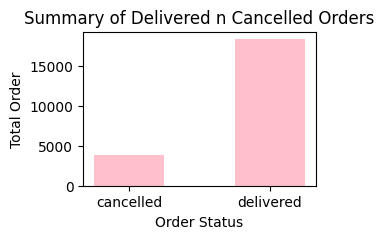

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (3,2))
plt.bar(df_sum['order_status'], df_sum['order_count'],
        color = 'pink', width = 0.5)
plt.xlabel('Order Status')
plt.ylabel('Total Order')
plt.title('Summary of Delivered n Cancelled Orders')

plt.show()

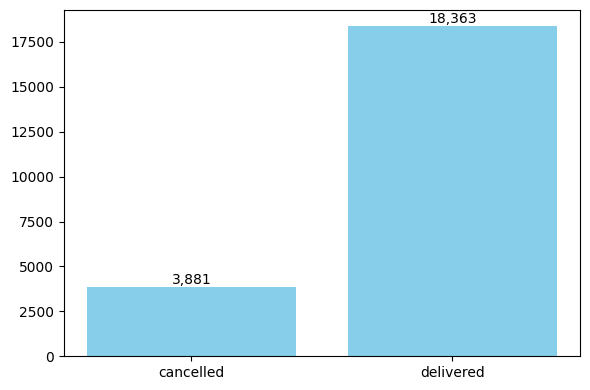

In [26]:
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(df_sum['order_status'], df_sum['order_count'], color='skyblue')

for bar in bars:
    tinggi = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # posisi horizontal (tengah batang)
        tinggi +0,                      # posisi vertikal (sedikit di atas batang)
        f'{tinggi:,}',                      # format angka ribuan
        ha='center', va='bottom', fontsize=10, color='black'
    )
plt.tight_layout()
plt.show()

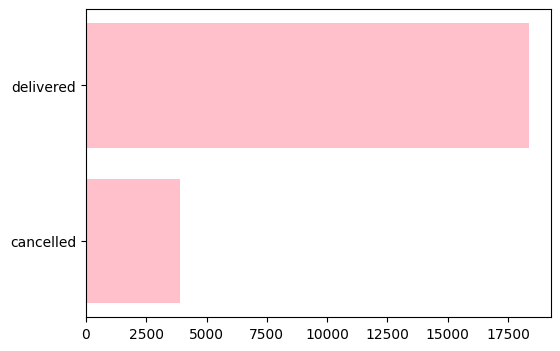

In [27]:
fig = plt.figure(figsize=(6,4))
plt.barh(df_sum['order_status'], df_sum['order_count'], color = 'pink')
plt.show()

In [28]:
df_order = df.groupby('order_status', as_index=False).agg(order_count=('order_id', 'nunique'))
df_order

,order_status,order_count
0,cancelled,3881
1,delivered,18363


In [29]:
df_date = df.groupby('order_date', as_index=False).agg(order_count=('order_id', 'count'))
df_date['order_date'] = pd.to_datetime(df_date['order_date']).dt.date
df_date
df_date.groupby('order_date', as_index=False)['order_count'].sum()

,order_date,order_count
0,2010-01-04,633
1,2010-01-05,932
2,2010-01-06,293
3,2010-01-07,842
4,2010-01-08,531
...,...,...
293,2010-12-19,480
294,2010-12-20,1585
295,2010-12-21,1461
296,2010-12-22,186


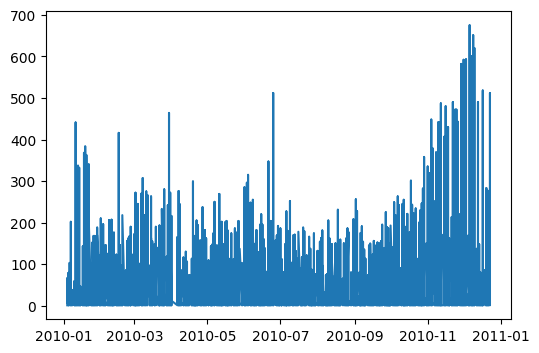

In [30]:
fig = plt.figure(figsize=(6,4))
plt.plot('order_date', 'order_count', data=df_date, linestyle='-')
plt.show()

In [31]:
df_tea_only = df[df['product_name'].str.contains('tea')]
df_tea_only

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status,amount,kategori
8,493414,21527,retro spot traditional teapot,12,2010-01-04 10:28:00,6.95,14590.0,delivered,83.40,cheap
10,C493415,21527,retro spot traditional teapot,3,2010-01-04 10:33:00,7.95,14590.0,cancelled,23.85,cheap
20,493427,79000,moroccan tea glass,12,2010-01-04 10:43:00,0.85,13287.0,delivered,10.20,cheap
56,C493430,21527,retro spot traditional teapot,1,2010-01-04 11:43:00,7.95,14680.0,cancelled,7.95,cheap
100,493432,22072,tea cup and saucer retro spot,2,2010-01-04 12:30:00,3.75,14680.0,delivered,7.50,cheap
...,...,...,...,...,...,...,...,...,...,...
457888,539958,22481,black tea towel classic design,3,2010-12-23 13:26:00,0.85,nan,delivered,2.55,cheap
457946,539958,22900,set 2 tea towels i love london,1,2010-12-23 13:26:00,5.91,nan,delivered,5.91,cheap
458217,539988,47559B,tea time oven glove,2,2010-12-23 16:06:00,1.25,18116.0,delivered,2.50,cheap
458235,539991,22891,tea for one polkadot,1,2010-12-23 16:49:00,4.25,nan,delivered,4.25,cheap


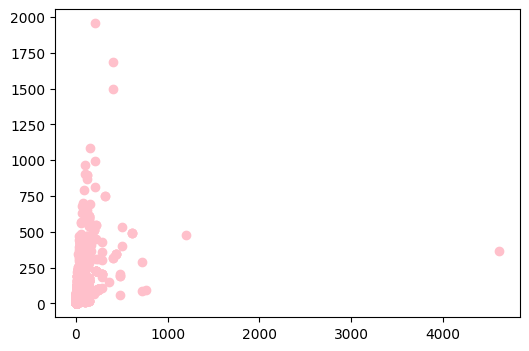

In [32]:
fig = plt.figure(figsize=(6,4))
plt.scatter(df_tea_only['quantity'], df_tea_only['amount'], c='pink', marker='o')
plt.show()

<Axes: ylabel='quantity'>

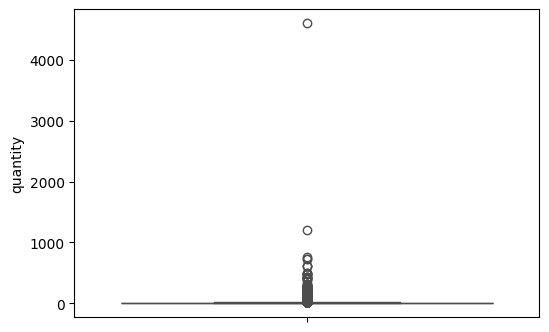

In [33]:
import seaborn as sns
fig = plt.figure(figsize=(6,4))
sns.boxplot(data = df_tea_only, y = 'quantity', color = 'red')

<Axes: ylabel='amount'>

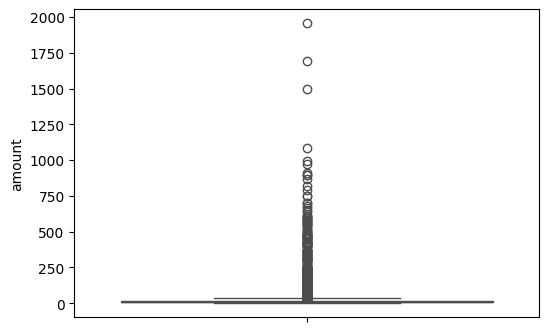

In [34]:
fig = plt.figure(figsize=(6,4))
sns.boxplot(data = df_tea_only, y = 'amount', color = 'red')

In [35]:
df_heat_map = df[['quantity', 'price', 'amount']]
df_heat_map

,quantity,price,amount
0,1,4.25,4.25
1,1,0.85,0.85
2,1,3.75,3.75
3,1,0.85,0.85
4,36,2.55,91.80
...,...,...,...
458241,1,1.25,1.25
458242,4,1.45,5.80
458243,1,3.75,3.75
458244,1,1.25,1.25


<Axes: >

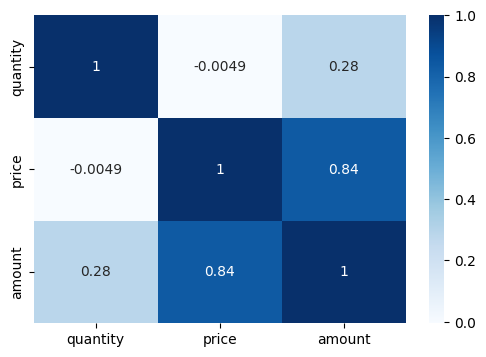

In [36]:
# pip install seaborn
import seaborn as sns
fig = plt.figure(figsize=(6, 4))
sns.heatmap(df_heat_map.corr(), cmap='Blues', annot=True)

In [37]:
# menghapus outlier
from scipy import stats
df = df[(np.abs(stats.zscore(df[['quantity','amount']]))<3).all(axis=1)]
df = df.reset_index(drop=True)
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status,amount,kategori
0,C493411,21539,retro spots butter dish,1,2010-01-04 09:43:00,4.25,14590.0,cancelled,4.25,cheap
1,493413,21724,panda and bunnies sticker sheet,1,2010-01-04 09:54:00,0.85,nan,delivered,0.85,cheap
2,493413,84578,elephant toy with blue t-shirt,1,2010-01-04 09:54:00,3.75,nan,delivered,3.75,cheap
3,493413,21723,alphabet hearts sticker sheet,1,2010-01-04 09:54:00,0.85,nan,delivered,0.85,cheap
4,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0,delivered,91.80,cheap
...,...,...,...,...,...,...,...,...,...,...
455491,539991,21618,4 wildflower botanical candles,1,2010-12-23 16:49:00,1.25,nan,delivered,1.25,cheap
455492,539991,72741,grand chocolatecandle,4,2010-12-23 16:49:00,1.45,nan,delivered,5.80,cheap
455493,539992,21470,flower vine raffia food cover,1,2010-12-23 17:41:00,3.75,nan,delivered,3.75,cheap
455494,539992,22258,felt farm animal rabbit,1,2010-12-23 17:41:00,1.25,nan,delivered,1.25,cheap


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455496 entries, 0 to 455495
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   order_id      455496 non-null  object  
 1   product_code  455496 non-null  object  
 2   product_name  455496 non-null  object  
 3   quantity      455496 non-null  int64   
 4   order_date    455496 non-null  object  
 5   price         455496 non-null  float64 
 6   customer_id   455496 non-null  object  
 7   order_status  455496 non-null  object  
 8   amount        455496 non-null  float64 
 9   kategori      455496 non-null  category
dtypes: category(1), float64(2), int64(1), object(6)
memory usage: 31.7+ MB


In [39]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['year_month'] = df['order_date'].dt.to_period('M')
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status,amount,kategori,year_month
0,C493411,21539,retro spots butter dish,1,2010-01-04 09:43:00,4.25,14590.0,cancelled,4.25,cheap,2010-01
1,493413,21724,panda and bunnies sticker sheet,1,2010-01-04 09:54:00,0.85,nan,delivered,0.85,cheap,2010-01
2,493413,84578,elephant toy with blue t-shirt,1,2010-01-04 09:54:00,3.75,nan,delivered,3.75,cheap,2010-01
3,493413,21723,alphabet hearts sticker sheet,1,2010-01-04 09:54:00,0.85,nan,delivered,0.85,cheap,2010-01
4,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0,delivered,91.80,cheap,2010-01
...,...,...,...,...,...,...,...,...,...,...,...
455491,539991,21618,4 wildflower botanical candles,1,2010-12-23 16:49:00,1.25,nan,delivered,1.25,cheap,2010-12
455492,539991,72741,grand chocolatecandle,4,2010-12-23 16:49:00,1.45,nan,delivered,5.80,cheap,2010-12
455493,539992,21470,flower vine raffia food cover,1,2010-12-23 17:41:00,3.75,nan,delivered,3.75,cheap,2010-12
455494,539992,22258,felt farm animal rabbit,1,2010-12-23 17:41:00,1.25,nan,delivered,1.25,cheap,2010-12


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455496 entries, 0 to 455495
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      455496 non-null  object        
 1   product_code  455496 non-null  object        
 2   product_name  455496 non-null  object        
 3   quantity      455496 non-null  int64         
 4   order_date    455496 non-null  datetime64[ns]
 5   price         455496 non-null  float64       
 6   customer_id   455496 non-null  object        
 7   order_status  455496 non-null  object        
 8   amount        455496 non-null  float64       
 9   kategori      455496 non-null  category      
 10  year_month    455496 non-null  period[M]     
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(5), period[M](1)
memory usage: 35.2+ MB


#COHORT Retention

In [41]:
df_user_monthly = df.groupby(['customer_id', 'year_month'], as_index=False).agg(order_count = ('order_id', 'nunique'))
df_user_monthly

,customer_id,year_month,order_count
0,12346.0,2010-01,1
1,12346.0,2010-03,1
2,12346.0,2010-06,2
3,12346.0,2010-10,1
4,12608.0,2010-10,1
...,...,...,...
12059,nan,2010-08,136
12060,nan,2010-09,152
12061,nan,2010-10,163
12062,nan,2010-11,155


In [42]:
df_user_monthly['cohort'] = df_user_monthly.groupby('customer_id')['year_month'].transform('min')
df_user_monthly

,customer_id,year_month,order_count,cohort
0,12346.0,2010-01,1,2010-01
1,12346.0,2010-03,1,2010-01
2,12346.0,2010-06,2,2010-01
3,12346.0,2010-10,1,2010-01
4,12608.0,2010-10,1,2010-10
...,...,...,...,...
12059,nan,2010-08,136,2010-01
12060,nan,2010-09,152,2010-01
12061,nan,2010-10,163,2010-01
12062,nan,2010-11,155,2010-01


In [43]:
from operator import attrgetter

df_user_monthly['period_num'] = (df_user_monthly['year_month'] - df_user_monthly['cohort']).apply(attrgetter('n'))+1
df_user_monthly

,customer_id,year_month,order_count,cohort,period_num
0,12346.0,2010-01,1,2010-01,1
1,12346.0,2010-03,1,2010-01,3
2,12346.0,2010-06,2,2010-01,6
3,12346.0,2010-10,1,2010-01,10
4,12608.0,2010-10,1,2010-10,1
...,...,...,...,...,...
12059,nan,2010-08,136,2010-01,8
12060,nan,2010-09,152,2010-01,9
12061,nan,2010-10,163,2010-01,10
12062,nan,2010-11,155,2010-01,11


In [44]:
df_cohort_pivot = pd.pivot_table(df_user_monthly, index = 'cohort', columns = 'period_num', values = 'customer_id', aggfunc=pd.Series.nunique)
df_cohort_pivot

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,713.0,282.0,335.0,315.0,306.0,305.0,294.0,268.0,286.0,321.0,337.0,251.0
2010-02,461.0,154.0,128.0,161.0,152.0,121.0,119.0,158.0,153.0,166.0,100.0,NaN
2010-03,527.0,146.0,158.0,144.0,139.0,123.0,148.0,185.0,192.0,95.0,NaN,NaN
2010-04,326.0,83.0,76.0,64.0,70.0,80.0,99.0,102.0,51.0,NaN,NaN,NaN
2010-05,275.0,55.0,50.0,52.0,52.0,73.0,67.0,43.0,NaN,NaN,NaN,NaN
2010-06,267.0,53.0,56.0,60.0,64.0,85.0,39.0,NaN,NaN,NaN,NaN,NaN
2010-07,180.0,38.0,37.0,52.0,53.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,160.0,35.0,50.0,48.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,226.0,63.0,60.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
cohort_size = df_cohort_pivot.iloc[:,0]
cohort_size

,1
cohort,
2010-01,713.0
2010-02,461.0
2010-03,527.0
2010-04,326.0
2010-05,275.0
2010-06,267.0
2010-07,180.0
2010-08,160.0
2010-09,226.0


In [46]:
df_retention_cohort = df_cohort_pivot.divide(cohort_size, axis=0)
df_retention_cohort

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,1.0,0.395512,0.469846,0.441795,0.429173,0.427770,0.412342,0.375877,0.401122,0.450210,0.472651,0.352034
2010-02,1.0,0.334056,0.277657,0.349241,0.329718,0.262473,0.258134,0.342733,0.331887,0.360087,0.216920,NaN
2010-03,1.0,0.277040,0.299810,0.273245,0.263757,0.233397,0.280835,0.351044,0.364326,0.180266,NaN,NaN
2010-04,1.0,0.254601,0.233129,0.196319,0.214724,0.245399,0.303681,0.312883,0.156442,NaN,NaN,NaN
2010-05,1.0,0.200000,0.181818,0.189091,0.189091,0.265455,0.243636,0.156364,NaN,NaN,NaN,NaN
2010-06,1.0,0.198502,0.209738,0.224719,0.239700,0.318352,0.146067,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.211111,0.205556,0.288889,0.294444,0.166667,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.218750,0.312500,0.300000,0.168750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,1.0,0.278761,0.265487,0.141593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'User Retention Cohort')

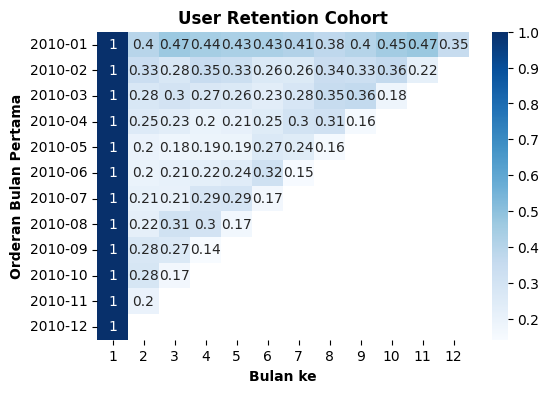

In [47]:
# simple :)
import seaborn as sns
fig = plt.figure(figsize=(6, 4))
sns.heatmap(df_retention_cohort, cmap='Blues', annot=True)
plt.xlabel('Bulan ke', fontweight='bold')
plt.ylabel('Orderan Bulan Pertama', fontweight='bold')
plt.title('User Retention Cohort', fontweight='bold')

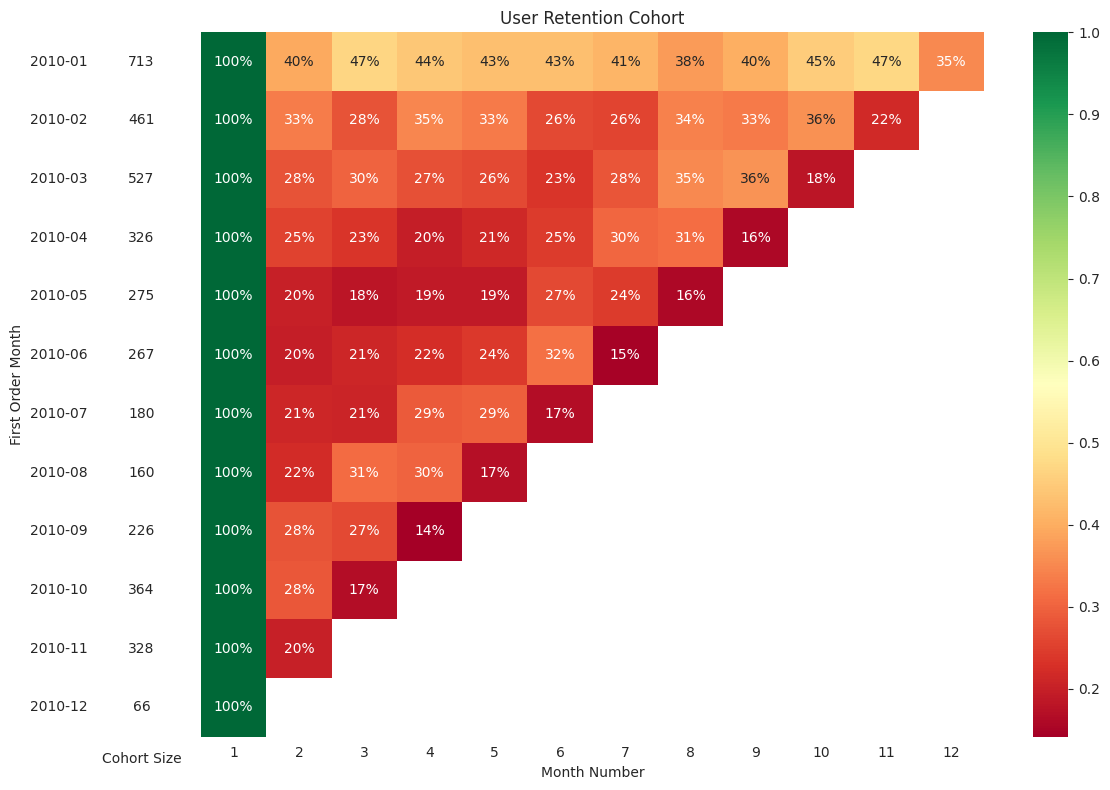

In [48]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

with sns.axes_style('white'):

    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios':[1, 11]})

    # user retention cohort
    sns.heatmap(df_retention_cohort, annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
    ax[1].set_title('User Retention Cohort')
    ax[1].set(xlabel='Month Number', ylabel='')

    # cohort size
    df_cohort_size = pd.DataFrame(cohort_size)
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
    ax[0].tick_params(bottom=False)
    ax[0].set(xlabel='Cohort Size', ylabel='First Order Month', xticklabels=[])

    fig.tight_layout()